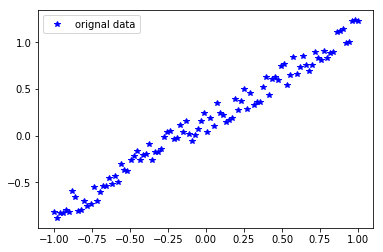

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1,1,100)
Y = X + np.random.rand(*X.shape)*0.3
plt.plot(X, Y, 'b*', label = 'orignal data')
plt.legend()
plt.show()

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Train_X = np.linspace(-1,1,100)
Train_Y = X + np.random.rand(*X.shape)*0.3

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

Z = tf.multiply(X, W) + b

cost = tf.reduce_mean(tf.square(z - Y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

train_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(train_epochs):
        for (x,y) in zip(Train_X,Train_Y):
            tf.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % display_step == 0:
            loss = sess.run(cost , feed_dict={{X:Train_X, Y:Train_Y}})
            print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))
            if not (loss == "NA"):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print "Done"
    print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))






ValueError: Cannot iterate over a shape with unknown rank.

In [1]:
import tensorflow as tf
print tf.__version__

1.14.0
